# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
Three observations:
    1. For northern hemisphere and southern hemisphere, the maximal temperature is related to latitude.
       The closer the latitude is to 0, the higher the maximal temperature is.
    2. The humidity, cloudiness, and wind speed are not or weakly related to latitude.
    3. The number of city in northern hemisphere is greater than the number of city in souther hemisphere when randomly selected.
    

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#set base url
base_url="http://api.openweathermap.org/data/2.5/weather?"
#set request urls
request_urls=[]
weathers=[]
citynames=[]
for city in cities:
    request_url=base_url+"appid=" + weather_api_key + "&q=" + city+"&units=imperial"
    request_urls.append(request_url)
#get json data 
i=range(0,len(cities))
n=0
print("Beginning Data Retrieval")
print("-------------------------------")
for request_url in request_urls:
    
    weather=requests.get(request_url).json()
#get city name and the sequence            
    try:
        x, y = divmod(i[n], 50)
        print(f"Processing Record {y+1} of set {x+1} | {weather['name']}")
        n+=1
    except (KeyError,ValueError):
        
        print("City not found. Skipping.............")
        pass
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")
        

Beginning Data Retrieval
-------------------------------
City not found. Skipping.............
Processing Record 1 of set 1 | Mount Gambier
Processing Record 2 of set 1 | Dwārka
Processing Record 3 of set 1 | Talnakh
Processing Record 4 of set 1 | Mataura
Processing Record 5 of set 1 | Kangaatsiaq
Processing Record 6 of set 1 | Paso de Carrasco
Processing Record 7 of set 1 | Hermanus
Processing Record 8 of set 1 | Colares
Processing Record 9 of set 1 | Saskylakh
Processing Record 10 of set 1 | Varberg
Processing Record 11 of set 1 | Shizunai-furukawachō
Processing Record 12 of set 1 | Upernavik
Processing Record 13 of set 1 | Makat
Processing Record 14 of set 1 | Ushuaia
Processing Record 15 of set 1 | Jamestown
Processing Record 16 of set 1 | Mahébourg
Processing Record 17 of set 1 | Hilo
Processing Record 18 of set 1 | Bilibino
Processing Record 19 of set 1 | Vaini
Processing Record 20 of set 1 | Cidreira
Processing Record 21 of set 1 | Marabu
Processing Record 22 of set 1 | Constitu

Processing Record 34 of set 4 | La Ronge
Processing Record 35 of set 4 | Mackenzie
Processing Record 36 of set 4 | Venado Tuerto
Processing Record 37 of set 4 | Kruisfontein
Processing Record 38 of set 4 | San Patricio
Processing Record 39 of set 4 | Qaanaaq
Processing Record 40 of set 4 | Angoram
Processing Record 41 of set 4 | Petropavlovsk-Kamchatskiy
Processing Record 42 of set 4 | Jinchang
Processing Record 43 of set 4 | Bac Lieu
Processing Record 44 of set 4 | Midland
City not found. Skipping.............
City not found. Skipping.............
Processing Record 45 of set 4 | Boa Vista
Processing Record 46 of set 4 | Saint Anthony
Processing Record 47 of set 4 | Anadyr
Processing Record 48 of set 4 | Yatou
Processing Record 49 of set 4 | Hithadhoo
Processing Record 50 of set 4 | Coyhaique
Processing Record 1 of set 5 | Tamisan
Processing Record 2 of set 5 | General Pico
Processing Record 3 of set 5 | Codrington
Processing Record 4 of set 5 | Faanui
Processing Record 5 of set 5 | Wa

Processing Record 20 of set 8 | Tázlár
Processing Record 21 of set 8 | Qasigiannguit
Processing Record 22 of set 8 | Seoul
Processing Record 23 of set 8 | Saldanha
Processing Record 24 of set 8 | Prudentópolis
Processing Record 25 of set 8 | Winnemucca
Processing Record 26 of set 8 | Torit
Processing Record 27 of set 8 | Nelson Bay
Processing Record 28 of set 8 | Port Macquarie
City not found. Skipping.............
Processing Record 29 of set 8 | Coquimbo
Processing Record 30 of set 8 | Viedma
Processing Record 31 of set 8 | Vostok
Processing Record 32 of set 8 | Ključ
Processing Record 33 of set 8 | Palmares do Sul
Processing Record 34 of set 8 | Ugoofaaru
City not found. Skipping.............
Processing Record 35 of set 8 | Mana
City not found. Skipping.............
Processing Record 36 of set 8 | Fort Nelson
Processing Record 37 of set 8 | Baiyin
Processing Record 38 of set 8 | Walvis Bay
Processing Record 39 of set 8 | Broken Hill
Processing Record 40 of set 8 | Rockland
Processing

Processing Record 3 of set 12 | Beroroha
Processing Record 4 of set 12 | Qandala
Processing Record 5 of set 12 | El Batey
Processing Record 6 of set 12 | Inhambane
Processing Record 7 of set 12 | Poanas
Processing Record 8 of set 12 | Adrar
Processing Record 9 of set 12 | El Limon
Processing Record 10 of set 12 | Great Falls
Processing Record 11 of set 12 | Nago
Processing Record 12 of set 12 | Ahar
Processing Record 13 of set 12 | Isla Mujeres
Processing Record 14 of set 12 | Hinton
City not found. Skipping.............
Processing Record 15 of set 12 | Bowen
Processing Record 16 of set 12 | Verkh-Usugli
Processing Record 17 of set 12 | Gunjur
Processing Record 18 of set 12 | Vanderhoof
Processing Record 19 of set 12 | Bogorodskoye
Processing Record 20 of set 12 | Chatrā
Processing Record 21 of set 12 | Cururupu
Processing Record 22 of set 12 | Broome
Processing Record 23 of set 12 | Sept-Îles
Processing Record 24 of set 12 | Lyangasovo
Processing Record 25 of set 12 | Fairbanks
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:

#get city name,latitude,longitude,max temp,humidity,cloudiness,wind speed, coutry, and date data from url and append to each list
citynames=[]
latitude=[]
longitude=[]
max_temp=[]
humidity=[]
cloudiness=[]
windspeed=[]
country=[]
date=[]
for request_url in request_urls:
    
    weather=requests.get(request_url).json()
    try:
        citynames.append(weather["name"])
        latitude.append(weather["coord"]["lat"])
        longitude.append(weather["coord"]["lon"])
        max_temp.append(weather["main"]["temp_max"])
        humidity.append(weather["main"]["humidity"])
        cloudiness.append(weather["clouds"]["all"])
        windspeed.append(weather["wind"]["speed"])
        country.append(weather["sys"]["country"])
        date.append(weather["dt"])
    except:
        
        continue
#round decimals of latitude,longitude, and max temp data to 2 after decimal point
lats=[]
for lat in latitude:
    lats.append(round(float(lat),2))

lngs=[]    
for lng in longitude:
    lngs.append(round(float(lng),2))

maxtemps=[]    
for x in max_temp:
    
    maxtemps.append(round(float(x),2))

#create dataframe with all the data
citydict={"City":citynames,
          "Lat":lats,
          "Lng":lngs,
          "Max Temp":maxtemps,
          "Humidity":humidity,
          "Cloudiness":cloudiness,
          "Wind Speed":windspeed,
          "Country":country,
          "Date":date}
citydata=pd.DataFrame(citydict)
#export to csv 
citydata.to_csv("c:/users/jane/gt-atl-data-pt-03-2021-u-c/06-Python-APIs/Homework/Instructions/output_data/cities2.csv")
#display csv data
path="../output_data/cities2.csv"
file_one = pd.read_csv(path, encoding="ISO-8859-1")
file_two=file_one.drop(columns=["Unnamed: 0"])
file_two.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Gambier,-37.83,140.77,53.60,87,90,8.05,AU,1619183172
1,DwÄrka,22.24,68.97,83.71,70,100,15.90,IN,1619183304
2,Talnakh,69.49,88.40,33.39,89,89,14.34,RU,1619183305
3,Mataura,-46.19,168.86,48.00,95,34,1.99,NZ,1619183306
4,Kangaatsiaq,68.31,-53.46,26.15,75,85,7.76,GL,1619183306


In [6]:
file_two.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,18.916412,15.592357,62.501179,65.563258,54.632582,8.564887,1.619183e+09
std,33.995652,88.849130,21.802487,23.258509,39.561970,5.748845,9.902496e+01
min,-54.800000,-175.200000,-10.680000,3.000000,0.000000,0.070000,1.619183e+09
25%,-9.430000,-60.320000,46.400000,53.000000,16.000000,4.320000,1.619183e+09
50%,22.680000,18.960000,66.200000,70.000000,63.000000,6.980000,1.619183e+09
75%,47.650000,88.120000,79.610000,83.000000,96.000000,11.500000,1.619184e+09
max,78.220000,179.320000,106.950000,100.000000,100.000000,34.740000,1.619184e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#set index
file_three=file_two.set_index(["City"])
#look for humidity>100
humidity100=file_three.loc[(file_three["Humidity"]>100)]
humidity100

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,


In [4]:
#  Get the indices of cities that have humidity over 100%.


In [5]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

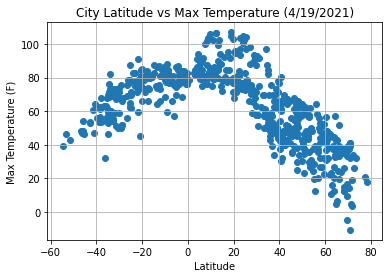

In [8]:
#scatter plot latitude vs temperature
plt.scatter(file_two["Lat"],file_two["Max Temp"])
plt.title("City Latitude vs Max Temperature (4/19/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
#save the figure
plt.savefig("../Images/Latitue vs Temperature Plot.png")
plt.show()
#Explanation: The closer the latitude is to 0, the higher the maximal temperature is.


## Latitude vs. Humidity Plot

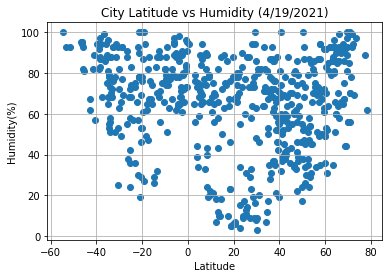

In [9]:
#scatter plot latitude vs humidity
plt.scatter(file_two["Lat"],file_two["Humidity"])
plt.title("City Latitude vs Humidity (4/19/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
#save the figure
plt.savefig("../Images/Latitue vs Humidity Plot.png")
plt.show()
#Explanation: The humidity is not or weakly related to the latitude. North hemisphere has some very low humidity areas.

## Latitude vs. Cloudiness Plot

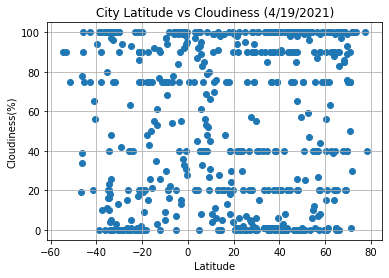

In [10]:
#scatter plot latitude vs cloudiness
plt.scatter(file_two["Lat"],file_two["Cloudiness"])
plt.title("City Latitude vs Cloudiness (4/19/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
#save the figure
plt.savefig("../Images/Latitue vs Cloudiness Plot.png")
plt.show()
#Explantion: The cloudiness is not or weakly related to the latitude.

## Latitude vs. Wind Speed Plot

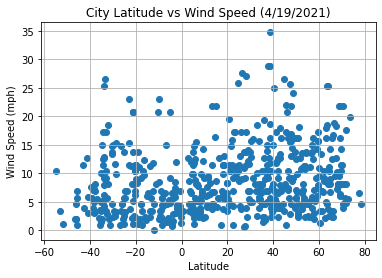

In [11]:
#scatter plot latitude vs wind speed
plt.scatter(file_two["Lat"],file_two["Wind Speed"])
plt.title("City Latitude vs Wind Speed (4/19/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
#save the figure
plt.savefig("../Images/Latitue vs Wind Speed Plot.png")
plt.show()
#Explanation: The sind speed is not or weakly related to the latitude. North hemisphere has some very high wind speed areas.

## Linear Regression

In [12]:
#create north hemisphere data by locking latitude >0
northern=file_two.loc[(file_two["Lat"]>0)]
#create south hemisphere data by locking latitude <0
southern=file_two.loc[(file_two["Lat"]<0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared is 0.72.


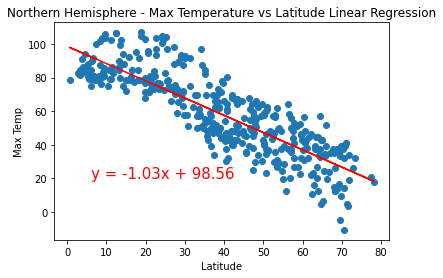

In [14]:
#scatter plot north hemisphere max temp vs latitude
plt.scatter(northern["Lat"],northern["Max Temp"])
plt.title("Northern Hemisphere - Max Temperature vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
#create linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"], northern["Max Temp"])
regress_values = northern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,20),fontsize=15,color="red")
#print r squared
print(f"The r squared is {round(rvalue**2,2)}.")


#export figure
plt.savefig("../Images/Northern Hemisphere - Max Temperature vs Latitude Linear Regression.png")
plt.show()
#Explanation: For northern hemisphere, the max temperature is highly related to the latitude. The higher the latitude, the lower the max temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared is 0.52.


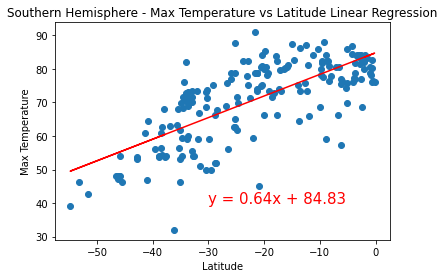

In [15]:
#scatter plot south hemisphere max temp vs latitude
plt.scatter(southern["Lat"],southern["Max Temp"])
plt.title("Southern Hemisphere - Max Temperature vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
#create linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"], southern["Max Temp"])
regress_values = southern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
#print r squared
print(f"The r squared is {round(rvalue**2,2)}.")


#export figure
plt.savefig("../Images/Southern Hemisphere - Max Temperature vs Latitude Linear Regression.png")
plt.show()
#Explanation: For southern hemisphere, the max temperature is highly related to the latitude. The higher the latitude, the lower the max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared is 0.05.


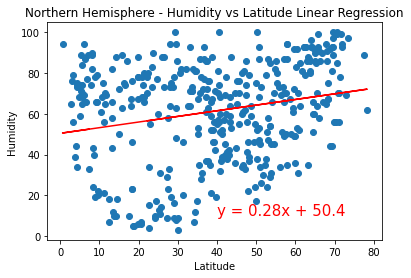

In [20]:
#scatter plot north hemisphere humidity vs latitude
plt.scatter(northern["Lat"],northern["Humidity"])
plt.title("Northern Hemisphere - Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
#create linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"], northern["Humidity"])
regress_values = northern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
#print r squared
print(f"The r squared is {round(rvalue**2,2)}.")


#export figure
plt.savefig("../Images/Northern Hemisphere - Humidity vs Latitude Linear Regression.png")
plt.show()
#Explanation: For northern hemisphere, the humidity is not or weakly related to the latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared is 0.01.


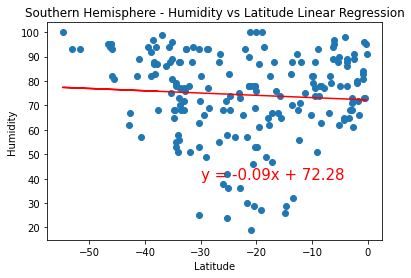

In [21]:
#scatter plot south hemisphere humidity vs latitude
plt.scatter(southern["Lat"],southern["Humidity"])
plt.title("Southern Hemisphere - Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
#create linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"], southern["Humidity"])
regress_values = southern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
#print r squared
print(f"The r squared is {round(rvalue**2,2)}.")


#export figure
plt.savefig("../Images/Southern Hemisphere - Humidity vs Latitude Linear Regression.png")
plt.show()
#Explanation: For southern hemisphere, the humidity is not or weakly related to the latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared is 0.02.


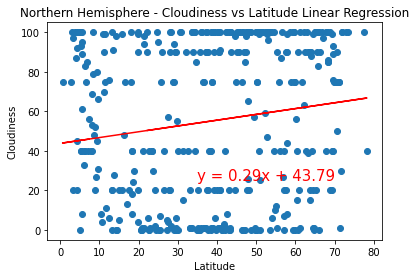

In [22]:
#scatter plot north hemisphere cloudiness vs latitude
plt.scatter(northern["Lat"],northern["Cloudiness"])
plt.title("Northern Hemisphere - Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
#create linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"], northern["Cloudiness"])
regress_values = northern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(35,25),fontsize=15,color="red")
#print r squared
print(f"The r squared is {round(rvalue**2,2)}.")


#export figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness vs Latitude Linear Regression.png")
plt.show()
#Explanation: For northern hemisphere, the cloudiness is not or weakly related to the latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared is 0.01.


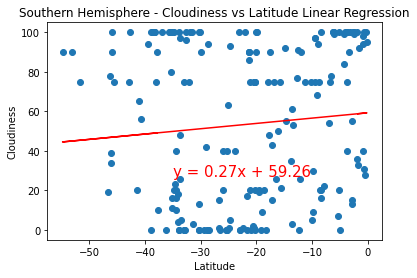

In [23]:
#scatter plot south hemisphere cloudiness vs latitude
plt.scatter(southern["Lat"],southern["Cloudiness"])
plt.title("Southern Hemisphere - Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
#create linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"], southern["Cloudiness"])
regress_values = southern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-35,27),fontsize=15,color="red")
#print r squared
print(f"The r squared is {round(rvalue**2,2)}.")


#export figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness vs Latitude Linear Regression.png")
plt.show()
#Explanation: For southern hemisphere, the cloudy is not or weakly related to the latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared is 0.01.


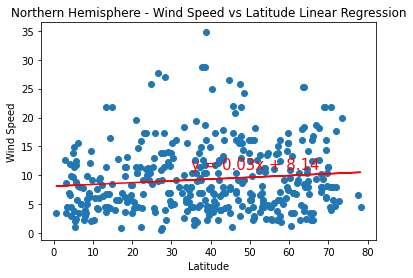

In [24]:
#scatter plot north hemisphere wind speed vs latitude
plt.scatter(northern["Lat"],northern["Wind Speed"])
plt.title("Northern Hemisphere - Wind Speed vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
#create linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"], northern["Wind Speed"])
regress_values = northern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(35,11),fontsize=15,color="red")
#print r squared
print(f"The r squared is {round(rvalue**2,2)}.")


#export figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs Latitude Linear Regression.png")
plt.show()
#Explanation: For northern hemisphere, the wind speed is not or weakly related to the latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared is 0.01.


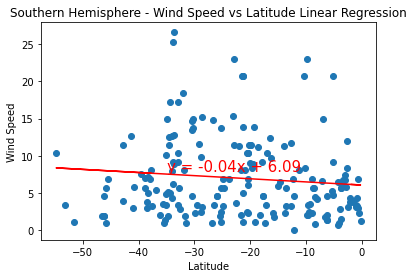

In [25]:
#scatter plot south hemisphere wind speed vs latitude
plt.scatter(southern["Lat"],southern["Wind Speed"])
plt.title("Southern Hemisphere - Wind Speed vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
#create linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"], southern["Wind Speed"])
regress_values = southern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-35,8),fontsize=15,color="red")
#print r squared
print(f"The r squared is {round(rvalue**2,2)}.")

#export figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs Latitude Linear Regression.png")
plt.show()
#Explanation: For southern hemisphere, the wind speed is not or weakly related to the latitude.

The r squared is 0.52.


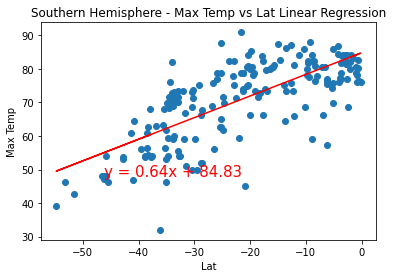

The r squared is 0.01.


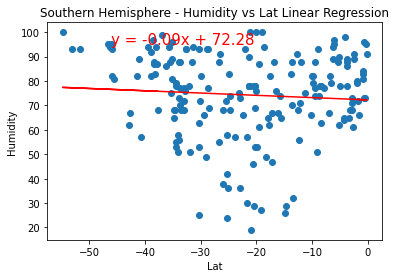

The r squared is 0.01.


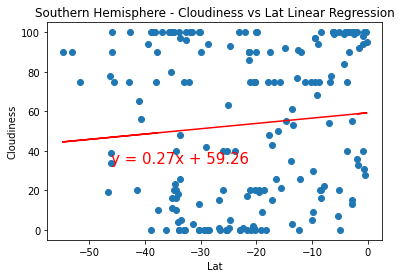

The r squared is 0.01.


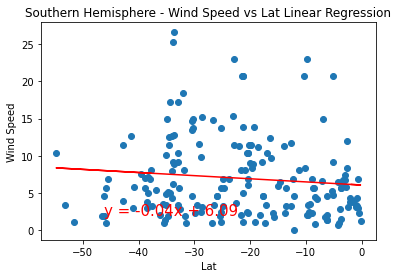

The r squared is 0.72.


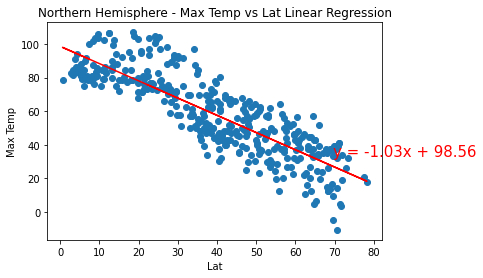

The r squared is 0.05.


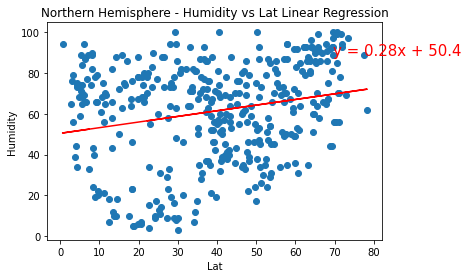

The r squared is 0.02.


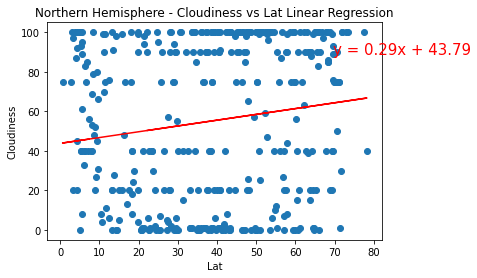

The r squared is 0.01.


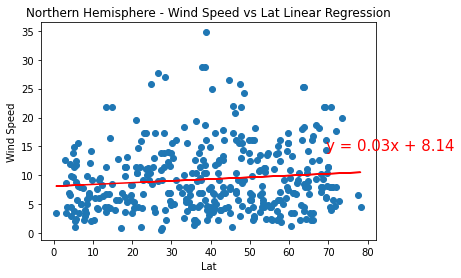

In [26]:
#bonus get all the linear Regression figures in for loop
df10=[southern,northern]
df11=["Southern","Northern"]
n=0

for n in range(len(df10)):
    for a in range(3,7):
        
        x=df10[n].iloc[:,1]
        y=df10[n].iloc[:,a]
        #scatter plot
        plt.scatter(x,y)
        plt.title(f"{df11[n]} Hemisphere - {df10[n].columns[a]} vs {df10[n].columns[1]} Linear Regression")
        plt.xlabel(f"{df10[n].columns[1]}")
        plt.ylabel(f"{df10[n].columns[a]}")
        #create linear regression
        (slope, intercept, rvalue, pvalue, stderr) = linregress(df10[n].iloc[:,1], df10[n].iloc[:,a])
        
        regress_values = df10[n].iloc[:,1] * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.plot(df10[n].iloc[:,1],regress_values,"r-")
        plt.annotate(line_eq,(df10[n].iloc[1,1],df10[n].iloc[1,a]),fontsize=15,color="red")
        print(f"The r squared is {round(rvalue**2,2)}.")
        #export figure
        plt.savefig(f"../Images/{df11[n]}{df10[n].columns[a]} vs {df10[n].columns[1]}.png")
        plt.show()
        a+=1
    n+=1
    